# Formación con 4 robots


Posiciones iniciales de los agentes: [[-1  1]
 [ 1  1]
 [ 1 -1]
 [-1 -1]]


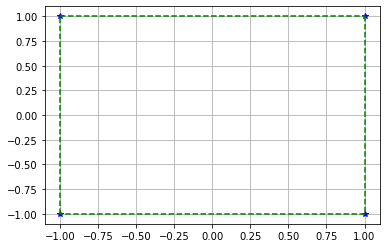

(8, 8)
[[-0.875  0.975]
 [ 0.975  0.875]
 [ 0.875 -0.975]
 [-0.975 -0.875]]
[[-0.75  0.95]
 [ 0.95  0.75]
 [ 0.75 -0.95]
 [-0.95 -0.75]]
[[-0.625  0.925]
 [ 0.925  0.625]
 [ 0.625 -0.925]
 [-0.925 -0.625]]
[[-0.5  0.9]
 [ 0.9  0.5]
 [ 0.5 -0.9]
 [-0.9 -0.5]]
[[-0.375  0.875]
 [ 0.875  0.375]
 [ 0.375 -0.875]
 [-0.875 -0.375]]
[[-0.25  0.85]
 [ 0.85  0.25]
 [ 0.25 -0.85]
 [-0.85 -0.25]]
[[-0.125  0.825]
 [ 0.825  0.125]
 [ 0.125 -0.825]
 [-0.825 -0.125]]
[[ 0.   0.8]
 [ 0.8  0. ]
 [ 0.  -0.8]
 [-0.8  0. ]]
[[ 0.125  0.775]
 [ 0.775 -0.125]
 [-0.125 -0.775]
 [-0.775  0.125]]
[[ 0.25  0.75]
 [ 0.75 -0.25]
 [-0.25 -0.75]
 [-0.75  0.25]]
[[ 0.375  0.725]
 [ 0.725 -0.375]
 [-0.375 -0.725]
 [-0.725  0.375]]
[[ 0.5  0.7]
 [ 0.7 -0.5]
 [-0.5 -0.7]
 [-0.7  0.5]]
[[ 0.625  0.675]
 [ 0.675 -0.625]
 [-0.625 -0.675]
 [-0.675  0.625]]
[[ 0.75  0.65]
 [ 0.65 -0.75]
 [-0.75 -0.65]
 [-0.65  0.75]]
[[ 0.875  0.625]
 [ 0.625 -0.875]
 [-0.875 -0.625]
 [-0.625  0.875]]
[[ 1.   0.6]
 [ 0.6 -1. ]
 [-1.  -0.6]

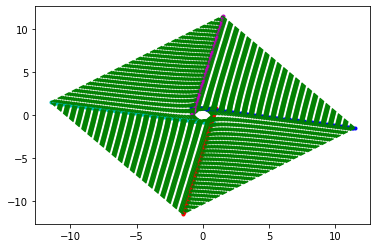

In [28]:
import RobotModels as rob
import robot_plot_utils as rplot
import numpy as np
import matplotlib.pyplot as plt
import graph_utils as graf


p=np.array([[-1, 1],[1,1],[1,-1],[-1, -1]])
Z=np.array([[1,2],[2,3],[3,4],[4,1]])
f,c=np.shape(p)
ps=np.zeros([2*f,1])
j=0
for i in range(f):
    ps[j]=p[i,0]
    ps[j+1]=p[i,1]
    j=j+2
    
plt.plot(p[:,0],p[:,1],'b*')
print("Posiciones iniciales de los agentes:",p)
g=np.zeros([2,2])
#Grafo
rplot.dibuja_grafo_2D(p,Z)
plt.grid()
plt.show() 
Mt=np.array([[-0.5,0,0,-0.5],[-0.5,-0.5,0,0],[0,-0.5,-0.5,0],[0,0,-0.5,-0.5]])
h=0.1
kapa=0.1
pesos=np.array([[1 ,1, 1, 1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
L=graf. matriz_laplaciana(Z,pesos,4,4)
B=graf.matriz_incidencia(Z,4,4)
Ld=L-(kapa/h)*Mt*B
Im=np.eye(2)
Ld_bar=np.kron(Ld,Im)
print(np.shape(Ld_bar))
pprima=-h*np.dot(Ld_bar,ps)
#print(pprima)
dt=0.5
for k in range(100):
    for i in range(0,8,2):
        xdot,ydot,thetadot=rob.integrator_point_model(pprima[i],pprima[i+1])
        ps[i]+=xdot*dt
        ps[i+1]+=ydot*dt
        if i==0:
            plt.plot(ps[i],ps[i+1],'b.')
        elif i==2:
            plt.plot(ps[i],ps[i+1],'r.')
        elif i==4:
            plt.plot(ps[i],ps[i+1],'c.')
        else:
            plt.plot(ps[i],ps[i+1],'m.') 
    p=graf.unstack(ps,2)
    print(p)
    rplot.dibuja_grafo_2D(p,Z)
plt.show() 